# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.formula.api as smf

# Customer satisfaction basic evolution

## Load data

In [4]:
from Olist.order import Order

In [5]:
orders = Order().get_training_data(with_distance_seller_customer=True)

In [6]:
from Olist.data import Olist

In [7]:
raw_data = Olist().get_data()

In [8]:
raw_orders = raw_data['orders']

In [9]:
orders.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037


In [10]:
raw_data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [11]:
order_items = raw_data['order_items']
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
raw_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [13]:
orders.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037


In [14]:
print(f'raw_orders # lines = {raw_orders.shape[0]} / orders # lines = {orders.shape[0]}')

raw_orders # lines = 99441 / orders # lines = 96525


In [15]:
orders.review_score.unique()

array([4, 5, 1, 2, 3])

In [16]:
plt.style.use('seaborn');
plt.rcParams['font.size'] = 14;
plt.figure(figsize=(12,5));
# palette = sns.color_palette('pastel')

<Figure size 864x360 with 0 Axes>

## Review score distribution

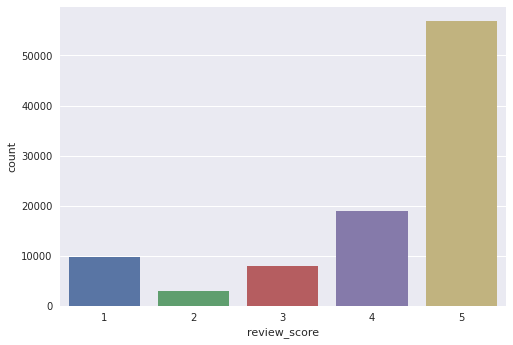

In [17]:
sns.countplot(x = 'review_score', data= orders, order=[1, 2, 3, 4, 5]);

In [18]:
review_percentages = orders.groupby(orders['review_score']).count().reset_index()
count_total = review_percentages['order_id'].sum()
review_percentages['percentage'] = review_percentages['order_id'].apply(lambda x: x / count_total)
review_percentages = review_percentages[['review_score', 'percentage']]

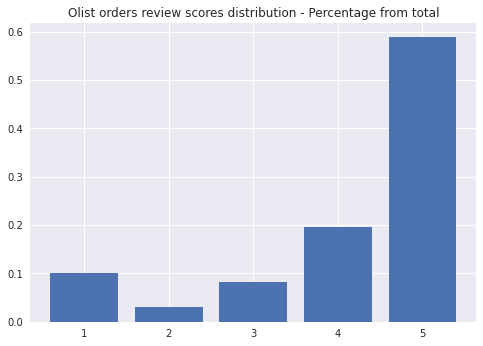

In [19]:
plt.bar(review_percentages['review_score'], review_percentages['percentage'])
plt.title('Olist orders review scores distribution - Percentage from total');

We see that out of 96 000 lines, almost 60 000  are rated 5/5. We can therefore than in the 2016-2018 period, **60% of orders entirely satisfied the customers**. 

On the contrary, **10% of orders are rated as 1**, the minimum. We will therefore have to understand why 10% of customers were unhappy and take action to limit those ratings in the future.

Moreover, we can see that are little orders that are rated 2. Are 3 and 4 positive or negative? It could be a second focus. 

In [20]:
orders = orders.merge(raw_orders[['order_id', 'order_delivered_customer_date']], on='order_id', how='inner')

In [21]:
orders.loc[:,'order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Looking at sellers

## Assumptions made:

**Revenue**

Olist takes a 10% cut on the product price (excl. freight) of each order delivered.
Olist charges 80 BRL by month per seller.

**Cost**

In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We will assume that we have an estimate measure of the monetary cost for each bad review:

In [22]:
review_scores_costs = pd.DataFrame(
    {"review_score": [1, 2, 3, 4 ,5], 
     "unit_cost": [100, 50, 40, 0, 0], 
     })
review_scores_costs

,review_score,unit_cost
0,1,100
1,2,50
2,3,40
3,4,0
4,5,0


In addition, Olist’s IT costs (servers, etc…) increase with the amount of orders processed, albeit less and less rapidly (scale effects).
For the sake of simplicity, we will consider **Olist’s total cumulated IT Costs to be proportional to the square-root of the total cumulated number of orders approved**.
The IT department also told you that since the birth of the marketplace, **cumulated IT costs have amounted to 500,000 BRL**.

## Attributing revenue & cost to sellers

In the Seller class, I computed different functions to achieve a DataFrame giving information for each seller:

In [34]:
from Olist.seller import Seller
sellers = Seller().get_training_data()

In [35]:
sellers.shape

(2970, 19)

In [36]:
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits,it_cost
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000,218.70,341.870,201.870,72.688090
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,2290.307,2050.307,265.419379
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000,158.00,15.800,15.800,41.966489
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000,79.99,7.999,7.999,41.966489
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000,167.99,16.799,-83.201,41.966489


<AxesSubplot:xlabel='profits', ylabel='Count'>

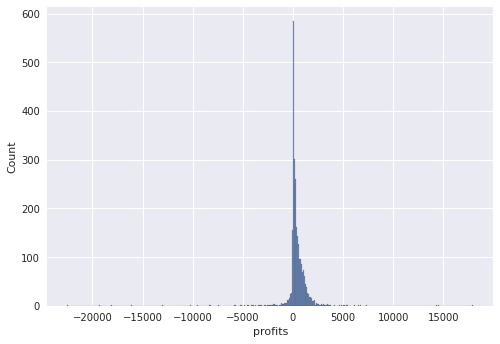

In [37]:
sns.histplot(sellers['profits'])

In [39]:
print(f'Number of sellers with negative profit = {sellers[sellers.profits < 0].shape[0]}')
print(f'% of sellers with negative profit = {sellers[sellers.profits < 0].shape[0] / sellers.shape[0]}')

Number of sellers with negative profit = 390
% of sellers with negative profit = 0.13131313131313133
